##### Importing required libraries 

In [112]:
import pandas as pd
import numpy as np

import re
import squarify

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as smf

from sklearn.metrics import mean_absolute_error
import pickle

In [113]:
data = pd.read_csv('cardekho_updated.csv')

In [114]:
print(f'''Number of rows : {data.shape[0]}
Number of columns : {data.shape[1]}''')

Number of rows : 19974
Number of columns : 13


In [115]:

data.head(300)

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.2 Lakh*,NaN,2012,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10 Asta,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,2.15 Lakh*,NaN,2010,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,NaN,2012,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Volkswagen Polo Petrol Trendline 1.2L,2.49 Lakh*,New Car (On-Road Price) : Rs.6.94-11.19 Lakh*,2011,Dealer,"63,000 kms",First Owner,Petrol,Manual,Mileage16.47 kmpl,Engine1198 CC,Max Power73.9 bhp,Seats5
296,Tata Hexa XT,14 Lakh*,New Car (On-Road Price) : Rs.14.10 Lakh*,2018,Individual,"30,000 kms",First Owner,Diesel,Manual,Mileage17.6 kmpl,Engine2179 CC,Max Power153.86 bhp,Seats7
297,Ford Figo Diesel ZXI,2.5 Lakh*,New Car (On-Road Price) : Rs.8.84-9.53 Lakh*,2011,Individual,"1,60,800 kms",First Owner,Diesel,Manual,Mileage20.0 kmpl,Engine1399 CC,Max Power68 bhp,Seats5
298,Hyundai Verna 1.6 SX,6.1 Lakh*,New Car (On-Road Price) : Rs.12.84-18.09 Lakh*,2014,Individual,"1,20,000 kms",First Owner,Diesel,Manual,Mileage22.32 kmpl,Engine1582 CC,Max Power126.32 bhp,Seats5


In [116]:
unique_values = []
def unique_val(lst):
    unique_values = []
    for col in list(data.columns):
        unique_values.append(data[col].nunique())
    return unique_values




##### Checking the null values

In [117]:
def null_count():
    return pd.DataFrame({'Features':data.columns,
                 'Data type':data.dtypes.values,
                 'NaN count':data.isnull().sum().values,
                 'NaN percentage':(data.isnull().sum().values/data.shape[0])*100,
                'Unique_count':unique_val(list(data.columns))})
    
null_count()

,Features,Data type,NaN count,NaN percentage,Unique_count
0,full_name,object,0,0.000000,3321
1,selling_price,object,0,0.000000,1215
2,new_price,object,10410,52.117753,1744
3,year,int64,0,0.000000,28
4,seller_type,object,0,0.000000,3
5,km_driven,object,0,0.000000,4515
6,owner_type,object,0,0.000000,1
7,fuel_type,object,0,0.000000,5
8,transmission_type,object,0,0.000000,2
9,mileage,object,160,0.801041,561


#### Cleaning the dataset

Selling price has values (2.5 Lakh* or 1.3 Cr*) so it needs to be converted into number format 250000 and

Values which are in thoudand( e.g 95000* ) we have to remove * from the end

In [118]:
def cleantext(text):
    if re.search('Lakh',text) is not None:
        text = re.sub(' Lakh\*','',text)
        text = float(text) * 100000
    elif re.search('Cr',text) is not None:
        text = re.sub(' Cr\*','',text)
        text = float(text) * 10000000
    else:
        text = re.sub("\*",'',text)
        text = re.sub(',','',text)
        text = float(text)
    return text
    

In [119]:
data['selling_price'] = data['selling_price'].apply(cleantext)

In [120]:
data.head()

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,120000.0,NaN,2012,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10 Asta,550000.0,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,215000.0,NaN,2010,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10 2010-2014 VXI,226000.0,NaN,2012,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000.0,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5


Cleaning km_driven,mileage,engine,max_power and seats columns as they have values like 

km_driven : 1,20,000 kms , mileage: Mileage19.7 kmpl, engine: Engine796CC, max_power : Max Power46.3bhp,seats:Seats5

we will only keep numeric values 

In [121]:
to_replace =  [',','kms','Mileage',' kmpl','Engine','CC','Max Power','bhp','Seats',' km/kg',' km/hr']
replace_with = ['']*11

In [122]:
data = data.replace(to_replace, replace_with, regex=True)

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19974 entries, 0 to 19973
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          19974 non-null  object 
 1   selling_price      19974 non-null  float64
 2   new_price          9564 non-null   object 
 3   year               19974 non-null  int64  
 4   seller_type        19974 non-null  object 
 5   km_driven          19974 non-null  object 
 6   owner_type         19974 non-null  object 
 7   fuel_type          19974 non-null  object 
 8   transmission_type  19974 non-null  object 
 9   mileage            19814 non-null  object 
 10  engine             19864 non-null  object 
 11  max_power          19637 non-null  object 
 12  seats              19887 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 2.0+ MB


<br>
<br>

changing the data type of numeric columns

In [124]:
data[['km_driven','mileage',
       'engine', 'max_power', 'seats']] = data[['km_driven','mileage',
       'engine', 'max_power', 'seats']].astype(float)

Creating new feature company from full_name columns 

For e.g. car name 'Hyundai i20 Asta	' belongs to 'Hyundai' company


In [125]:
data['company']=data['full_name'].str.split(' ',expand=True)[0]

In [126]:
data.head()

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats,company
0,Maruti Alto Std,120000.0,NaN,2012,Individual,120000.0,First Owner,Petrol,Manual,19.70,796.0,46.30,5.0,Maruti
1,Hyundai Grand i10 Asta,550000.0,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,20000.0,First Owner,Petrol,Manual,18.90,1197.0,82.00,5.0,Hyundai
2,Hyundai i20 Asta,215000.0,NaN,2010,Individual,60000.0,First Owner,Petrol,Manual,17.00,1197.0,80.00,5.0,Hyundai
3,Maruti Alto K10 2010-2014 VXI,226000.0,NaN,2012,Individual,37000.0,First Owner,Petrol,Manual,20.92,998.0,67.10,5.0,Maruti
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000.0,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,30000.0,First Owner,Diesel,Manual,22.77,1498.0,98.59,5.0,Ford


#### Droping unwanted columns<br>

Droping "new_price" column which has more the 50 percent missing values, "full_name" because I created company column for better analysis and "owner_type" for having only one value which doesn't provide any information.</p>

In [127]:
data.drop(columns=['new_price','full_name','owner_type'], axis=1, inplace=True)
data.head()

,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,company
0,120000.0,2012,Individual,120000.0,Petrol,Manual,19.70,796.0,46.30,5.0,Maruti
1,550000.0,2016,Individual,20000.0,Petrol,Manual,18.90,1197.0,82.00,5.0,Hyundai
2,215000.0,2010,Individual,60000.0,Petrol,Manual,17.00,1197.0,80.00,5.0,Hyundai
3,226000.0,2012,Individual,37000.0,Petrol,Manual,20.92,998.0,67.10,5.0,Maruti
4,570000.0,2015,Dealer,30000.0,Diesel,Manual,22.77,1498.0,98.59,5.0,Ford


### Exploratory data analysis

In [128]:
data.describe()

,selling_price,year,km_driven,mileage,engine,max_power,seats
count,1.997400e+04,19974.000000,1.997400e+04,19814.000000,19864.000000,19637.000000,19887.000000
mean,7.392945e+05,2014.526134,5.823889e+04,19.503637,1477.805981,99.448762,5.319807
std,9.104001e+05,3.248791,5.172760e+04,4.298090,519.843056,43.784904,0.837676
min,2.500000e+04,1991.000000,1.000000e+02,4.000000,72.000000,25.400000,2.000000
25%,3.400000e+05,2013.000000,3.111400e+04,16.950000,1197.000000,73.940000,5.000000
50%,5.200000e+05,2015.000000,5.200000e+04,19.300000,1248.000000,86.800000,5.000000
75%,7.850000e+05,2017.000000,7.400000e+04,22.320000,1582.000000,114.000000,5.000000
max,3.950000e+07,2021.000000,3.800000e+06,120.000000,6752.000000,626.000000,14.000000


In [129]:
data.describe(include='O')

,seller_type,fuel_type,transmission_type,company
count,19974,19974,19974,19974
unique,3,5,2,42
top,Dealer,Diesel,Manual,Maruti
freq,11970,9815,16025,5648


##### Univariate analysis of Numeric features

In [130]:
data.columns


Index(['selling_price', 'year', 'seller_type', 'km_driven', 'fuel_type',
       'transmission_type', 'mileage', 'engine', 'max_power', 'seats',
       'company'],
      dtype='object')

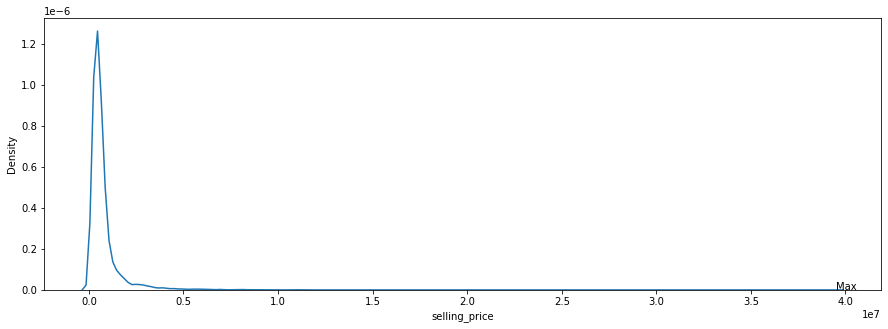

In [131]:
fig = plt.figure(figsize=(15,5))
sns.kdeplot(data.selling_price)
plt.text(x=data.selling_price.max(),s='Max',y=0,size='medium')
plt.show()

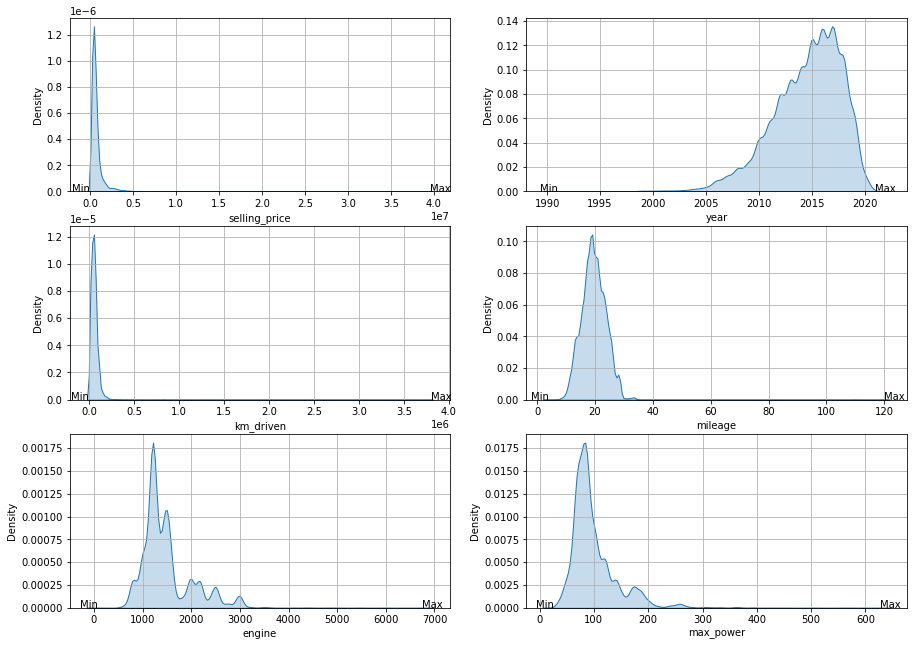

In [132]:
numeric_cols = ['selling_price', 'year', 'km_driven','mileage', 'engine', 'max_power']

fig = plt.figure(figsize=(15,30))
plt_no = 0
for i in numeric_cols:  
    ax = plt.subplot(8,2,plt_no+1)
    plt_no += 1
    sns.kdeplot(data[i],palette="crest",fill=True,shade=True)
    plt.text(x=data[i].max(),s='Max',y=0,size='medium')
    plt.text(x=data[i].min(),s='Min',y=0,size='medium',horizontalalignment='right')
    plt.grid(True)
    plt.xlabel(i)
    plt.ylabel('Density')
plt.show()

In [133]:
##### Univariate analysis of Categorical features

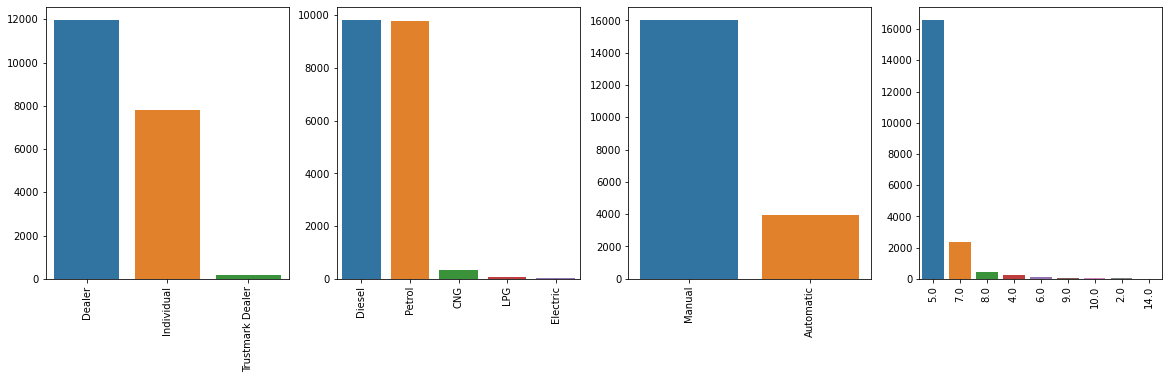

In [134]:
categorical_cols = ['seller_type','fuel_type',
       'transmission_type', 'seats']

fig = plt.figure(figsize=(20,5))
plt_no = 0
for i in categorical_cols:  
    cout_dict = dict(data[i].value_counts())
    count = list(cout_dict.values())
    labels = list(cout_dict.keys())
    y_pos = np.arange(len(labels))
    ax = plt.subplot(1,4,plt_no+1)
    plt_no += 1
    sns.barplot(x=y_pos,y=count)
    plt.xticks(y_pos,list(cout_dict.keys()),rotation ='vertical')
plt.show()

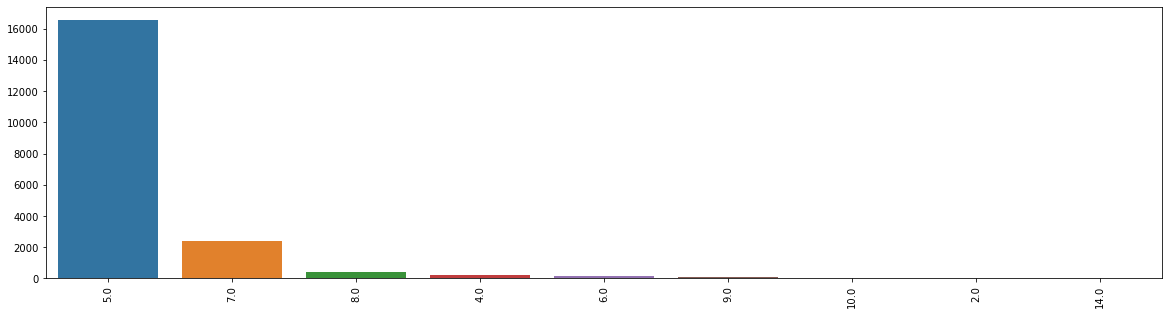

In [135]:
company_cout_dict = dict(data['company'].value_counts())
count = list(cout_dict.values())
labels = list(cout_dict.keys())
y_pos = np.arange(len(labels))
fig = plt.figure(figsize=(20,5))
sns.barplot(x=y_pos,y=count)
plt.xticks(y_pos,list(cout_dict.keys()),rotation ='vertical')
plt.show()

In [136]:
list(company_cout_dict.values())[:10]

[5648, 3645, 1781, 1291, 1205, 975, 908, 762, 636, 501]

In [137]:
top_10_company={}
for k,v in company_cout_dict.items():
    if v in list(company_cout_dict.values())[:10]:
        top_10_company.update({k:v})
        

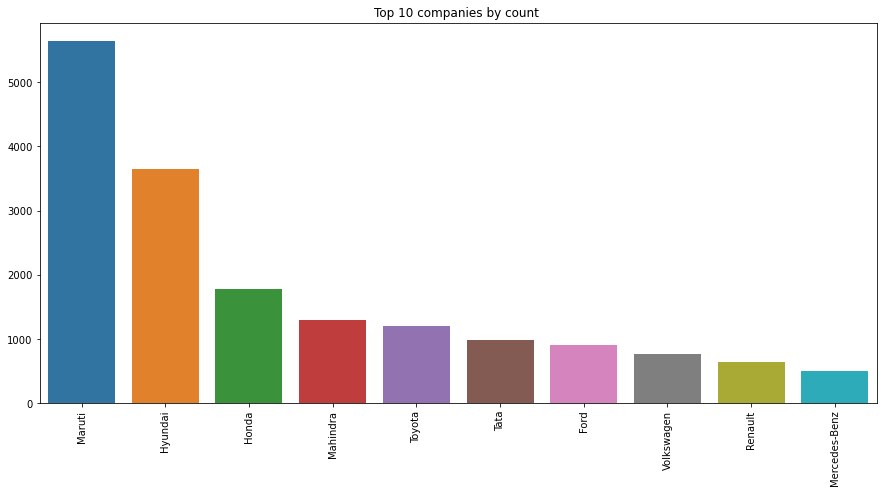

In [138]:

count = list(top_10_company.values())
labels = list(top_10_company.keys())
y_pos = np.arange(len(labels))
fig = plt.figure(figsize=(15,7))
sns.barplot(x=y_pos,y=count)
plt.xticks(y_pos,list(top_10_company.keys()),rotation ='vertical')
plt.title('Top 10 companies by count ')
plt.show()

In [139]:
least_10_company={}
for k,v in company_cout_dict.items():
    if v in list(company_cout_dict.values())[-10:]:
        least_10_company.update({k:v})
        

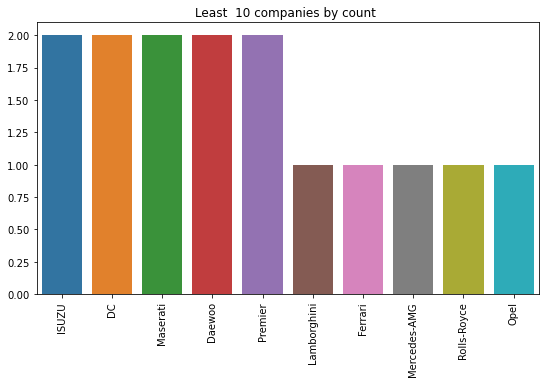

In [140]:
count = list(least_10_company.values())
labels = list(least_10_company.keys())
y_pos = np.arange(len(labels))
fig = plt.figure(figsize=(9,5))
sns.barplot(x=y_pos,y=count)
plt.xticks(y_pos,list(least_10_company.keys()),rotation ='vertical')
plt.title('Least  10 companies by count ')
plt.show()

### Bivariate analysis

####  Selling price vs Numeric variables

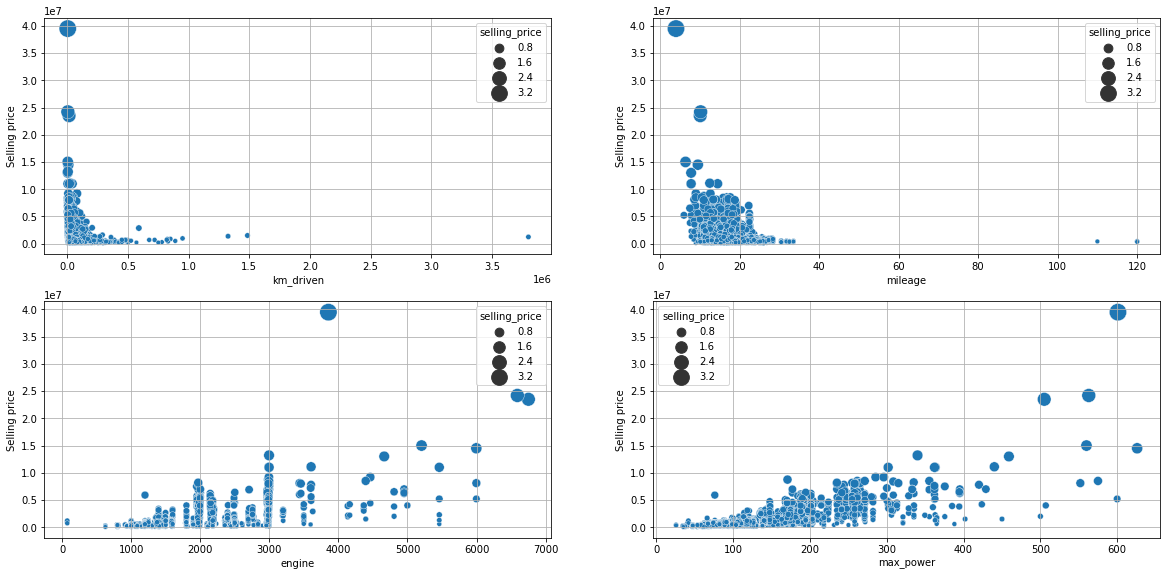

In [141]:
numeric_features = ['km_driven','mileage', 'engine', 'max_power']

fig = plt.figure(figsize=(20,20))
plt_no = 0
for i in numeric_features:  
    ax = plt.subplot(4,2,plt_no+1)
    plt_no += 1
    sns.scatterplot(data=data,x=data[i],y='selling_price',size="selling_price",legend='brief',sizes=(20, 300))
    plt.grid(True)
    plt.xlabel(i)
    plt.ylabel('Selling price')
plt.show()

####  Selling price vs Categorical variables

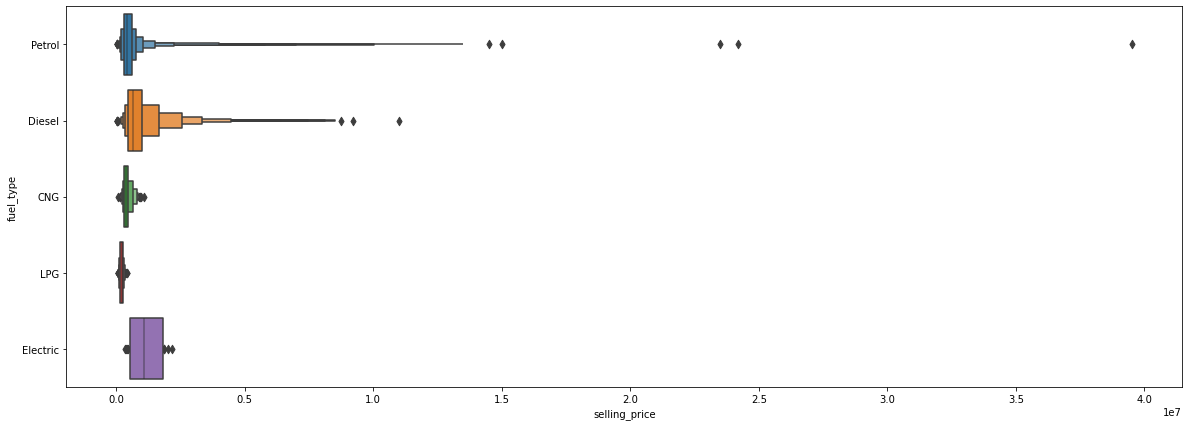

In [142]:
fig = plt.figure(figsize=(20,7))
sns.boxenplot(y='fuel_type', x="selling_price", data=data)
plt.show()

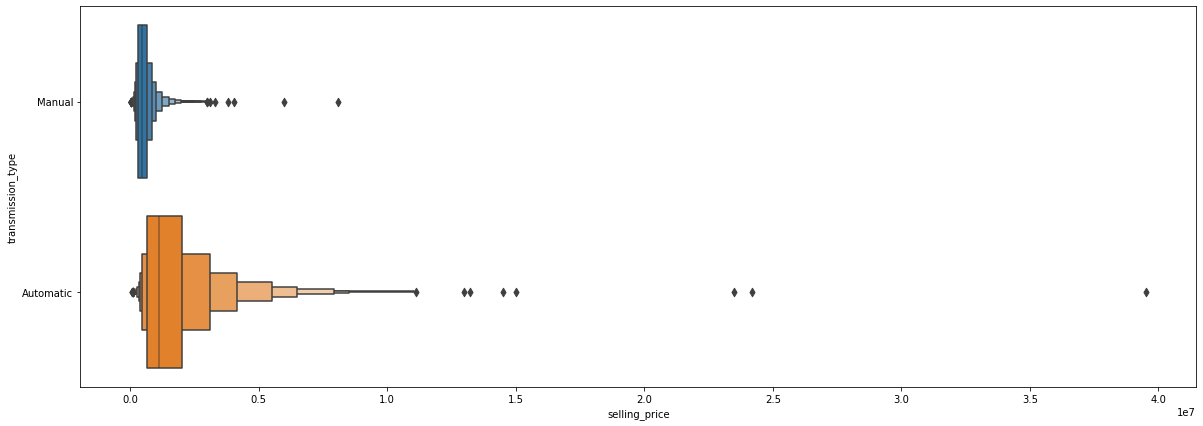

In [143]:
fig = plt.figure(figsize=(20,7))
sns.boxenplot(y='transmission_type', x="selling_price", data=data)
plt.show()

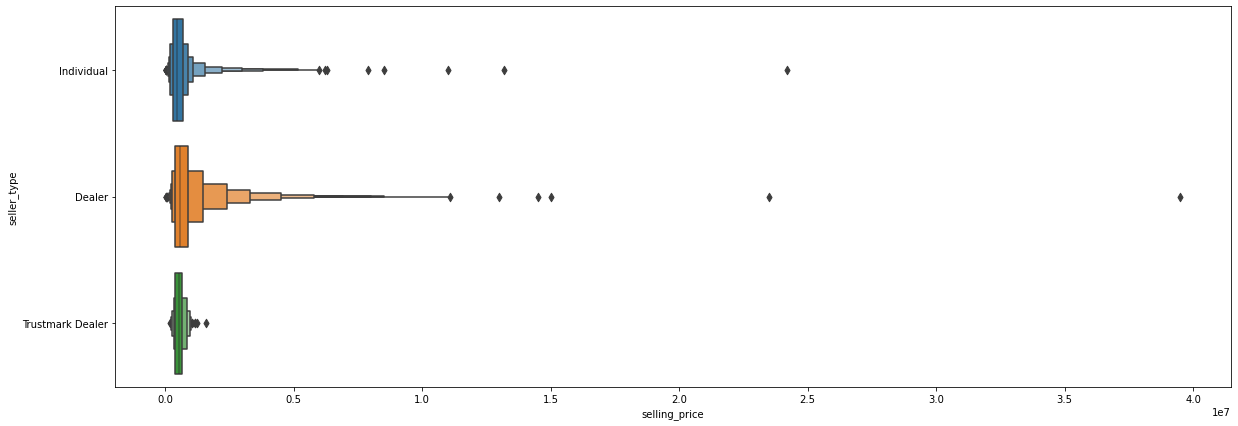

In [144]:
fig = plt.figure(figsize=(20,7))
sns.boxenplot(y='seller_type', x="selling_price", data=data)
plt.show()

#### Multivariate analysis

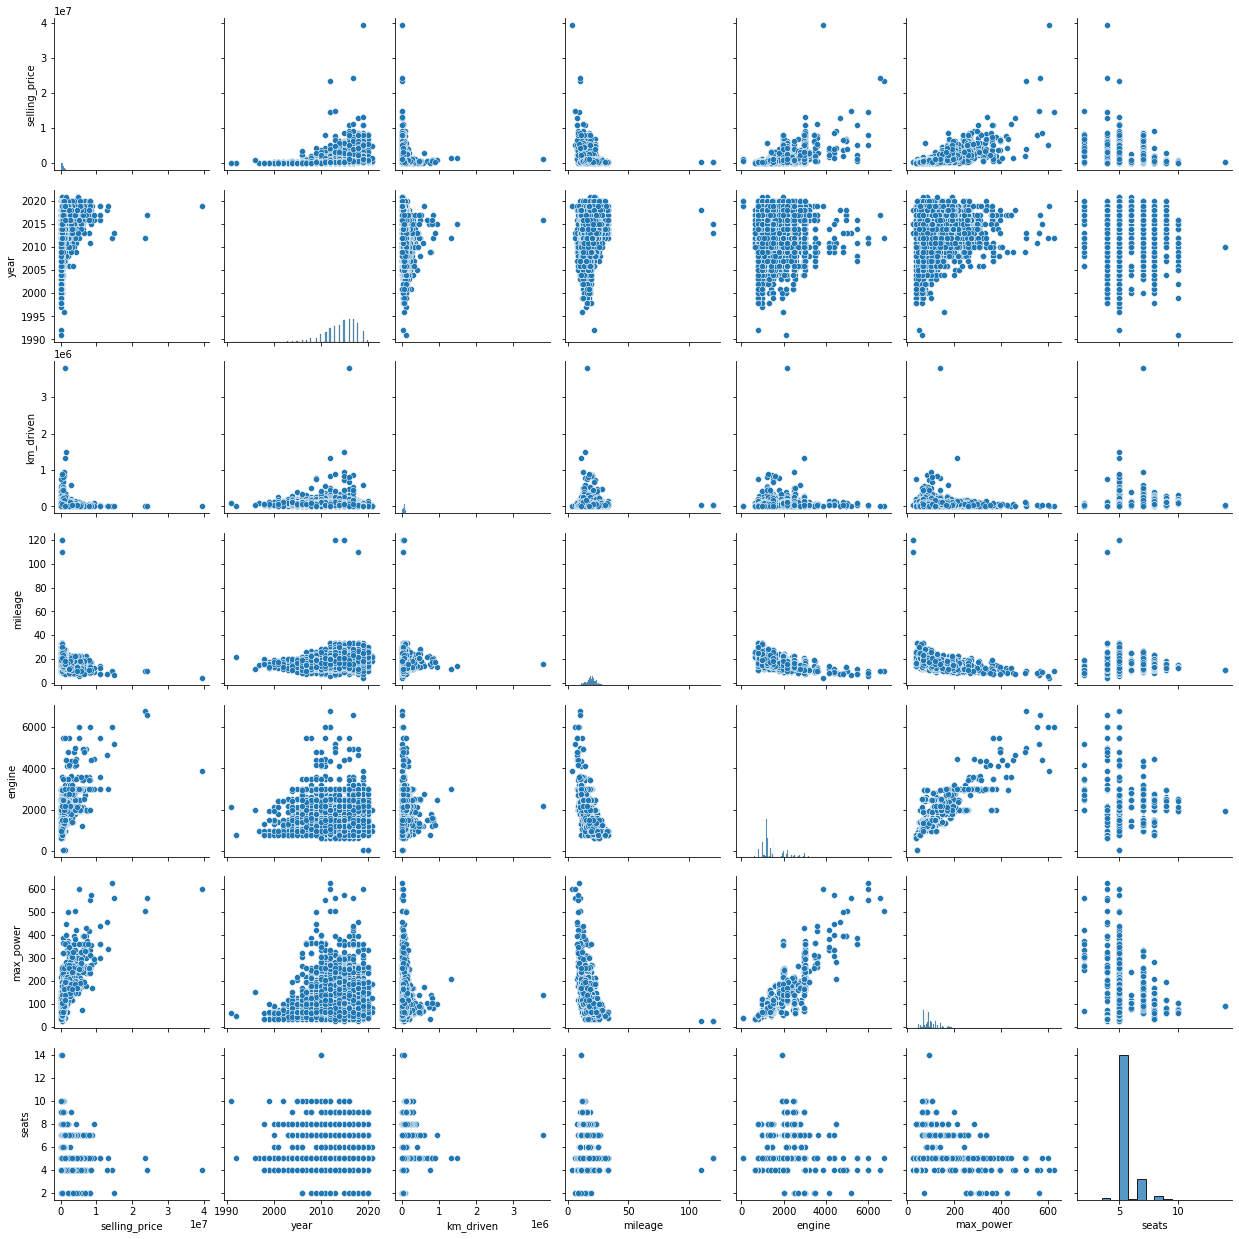

In [145]:
sns.pairplot(data)

<AxesSubplot:>

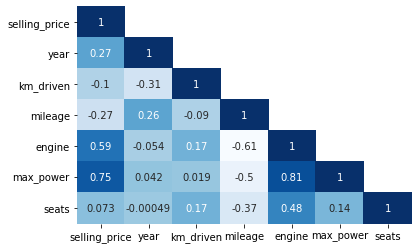

In [146]:
sns.heatmap(data.corr(), cmap='Blues', mask=np.triu(data.corr(), k=1), cbar=False, annot=True)

### Feature Engineering

In [147]:
null_count()

,Features,Data type,NaN count,NaN percentage,Unique_count
0,selling_price,float64,0,0.000000,1215
1,year,int64,0,0.000000,28
2,seller_type,object,0,0.000000,3
3,km_driven,float64,0,0.000000,4499
4,fuel_type,object,0,0.000000,5
5,transmission_type,object,0,0.000000,2
6,mileage,float64,160,0.801041,532
7,engine,float64,110,0.550716,169
8,max_power,float64,337,1.687193,488
9,seats,float64,87,0.435566,9


In [148]:
#### as our data is highly skewed filling out the NaN values with median

In [149]:
for i in ['mileage', 'engine', 'max_power', 'seats']:
    for com in list(company_cout_dict.keys()):
        values = data[data['company']==com][i].median()
        data[i].fillna(values, inplace=True)

In [150]:
null_count()

,Features,Data type,NaN count,NaN percentage,Unique_count
0,selling_price,float64,0,0.0,1215
1,year,int64,0,0.0,28
2,seller_type,object,0,0.0,3
3,km_driven,float64,0,0.0,4499
4,fuel_type,object,0,0.0,5
5,transmission_type,object,0,0.0,2
6,mileage,float64,0,0.0,532
7,engine,float64,0,0.0,169
8,max_power,float64,0,0.0,488
9,seats,float64,0,0.0,9


In [151]:
data.describe()

,selling_price,year,km_driven,mileage,engine,max_power,seats
count,1.997400e+04,19974.000000,1.997400e+04,19974.000000,19974.000000,19974.000000,19974.000000
mean,7.392945e+05,2014.526134,5.823889e+04,19.519629,1476.259537,99.019392,5.318414
std,9.104001e+05,3.248791,5.172760e+04,4.284538,518.825956,43.537499,0.836115
min,2.500000e+04,1991.000000,1.000000e+02,4.000000,72.000000,25.400000,2.000000
25%,3.400000e+05,2013.000000,3.111400e+04,16.950000,1197.000000,73.970000,5.000000
50%,5.200000e+05,2015.000000,5.200000e+04,19.300000,1248.000000,86.700000,5.000000
75%,7.850000e+05,2017.000000,7.400000e+04,22.320000,1582.000000,112.000000,5.000000
max,3.950000e+07,2021.000000,3.800000e+06,120.000000,6752.000000,626.000000,14.000000


In [152]:
['selling_price', 'km_driven', 'mileage', 'engine', 'max_power']

['selling_price', 'km_driven', 'mileage', 'engine', 'max_power']

### Removing outliers

#### Selling price

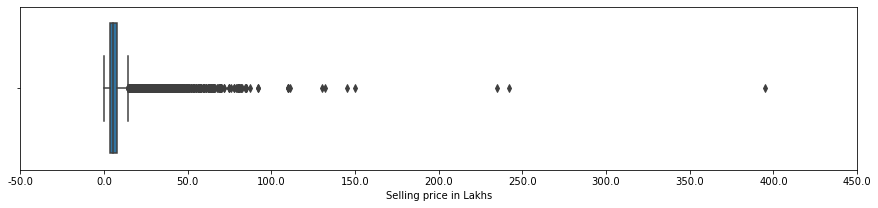

In [153]:
fig = plt.figure(figsize=(15,3))
fig = sns.boxplot(x=data.selling_price)
plt.xticks(fig.get_xticks(),fig.get_xticks()/100000)
plt.xlabel('Selling price in Lakhs')
plt.show()


In [154]:
data = data[data['selling_price'] < 20000000]

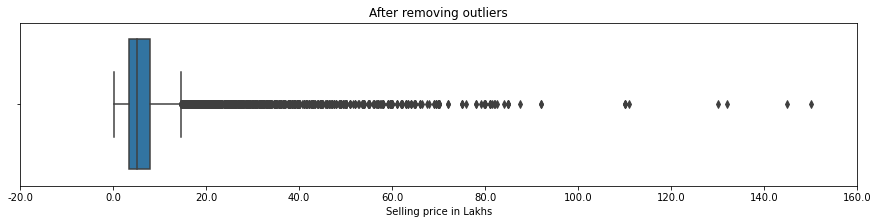

In [155]:
fig = plt.figure(figsize=(15,3))
fig = sns.boxplot(x=data.selling_price)
plt.xticks(fig.get_xticks(),fig.get_xticks()/100000)
plt.xlabel('Selling price in Lakhs')
plt.title('After removing outliers')
plt.show()

#### KM_driven

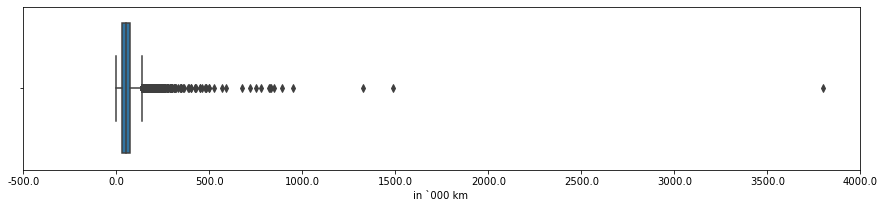

In [156]:
fig = plt.figure(figsize=(15,3))
fig = sns.boxplot(x=data.km_driven)
plt.xticks(fig.get_xticks(),fig.get_xticks()/1000)
plt.xlabel('in `000 km ')
plt.show()

In [157]:
data = data[data['km_driven'] < 1000000]

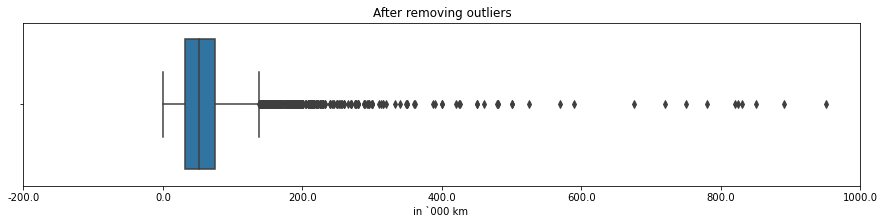

In [158]:
fig = plt.figure(figsize=(15,3))
fig = sns.boxplot(x=data.km_driven)
plt.xticks(fig.get_xticks(),fig.get_xticks()/1000)
plt.xlabel('in `000 km ')
plt.title('After removing outliers')
plt.show()

#### mileage

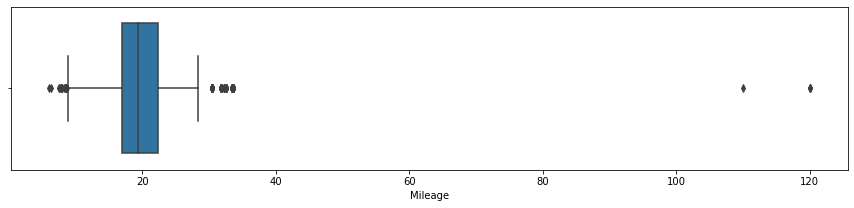

In [159]:
fig = plt.figure(figsize=(15,3))
fig = sns.boxplot(x=data.mileage)
plt.xlabel('Mileage')
plt.show()

In [160]:
data = data[data['mileage'] < 100]

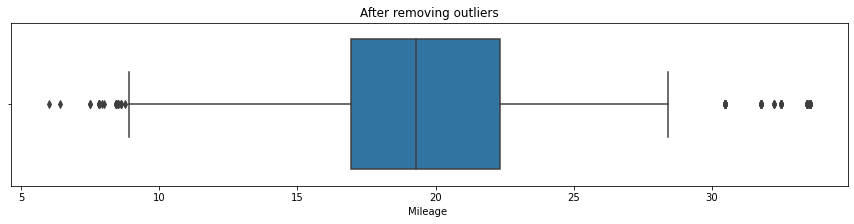

In [161]:
fig = plt.figure(figsize=(15,3))
fig = sns.boxplot(x=data.mileage)
plt.xlabel('Mileage ')
plt.title('After removing outliers')
plt.show()

#### engine

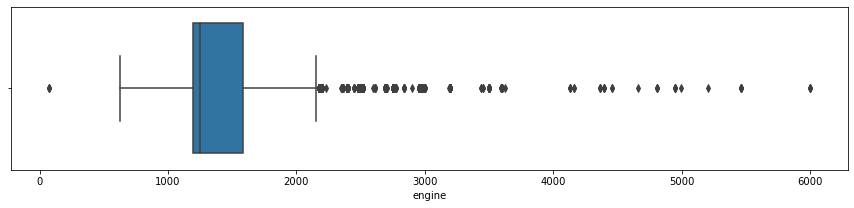

In [162]:
fig = plt.figure(figsize=(15,3))
fig = sns.boxplot(x=data.engine)
plt.xlabel('engine')
plt.show()

In [163]:
data = data[data['engine'] > 100]

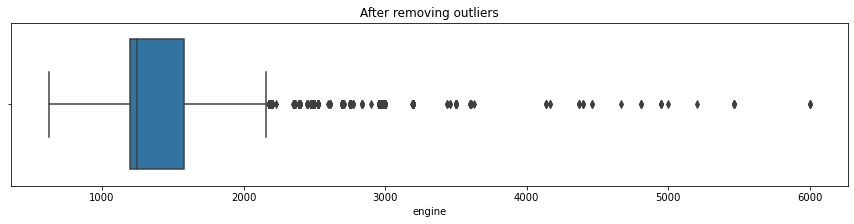

In [164]:
fig = plt.figure(figsize=(15,3))
fig = sns.boxplot(x=data.engine)
plt.xlabel('engine')
plt.title('After removing outliers')
plt.show()

#### max_power

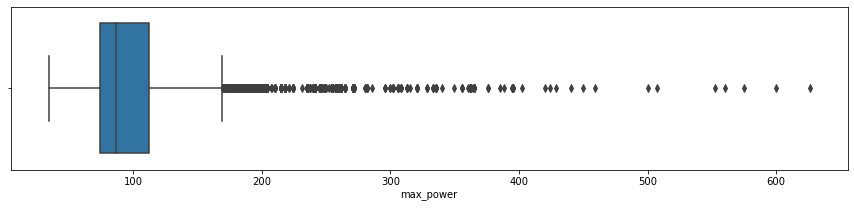

In [165]:
fig = plt.figure(figsize=(15,3))
fig = sns.boxplot(x=data.max_power)
plt.xlabel('max_power')
plt.show()

In [166]:
data = data[data['max_power'] < 550]

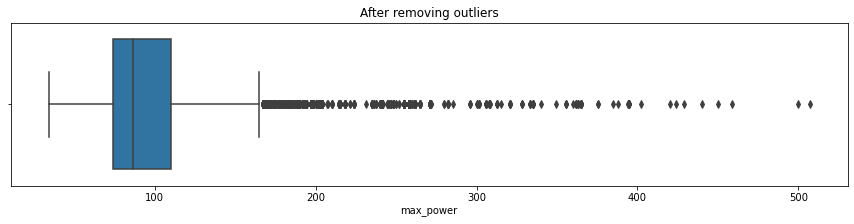

In [167]:
fig = plt.figure(figsize=(15,3))
fig = sns.boxplot(x=data.max_power)
plt.xlabel('max_power')
plt.title('After removing outliers')
plt.show()

In [168]:
data = data.reset_index(drop=True)

In [169]:
company_name = data.company.value_counts().index[:28]

In [170]:
#### keeping only those companies whos has 10 or more than 10 rows

company_name = data.company.value_counts().index[:28]
for i in range(data.shape[0]):
    if data['company'][i] in company_name:
         continue
    else:
        data['company'][i] = 'others'

<ipython-input-170-03d18be50e2d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['company'][i] = 'others'


In [171]:
### Encoding categorical features

In [172]:
data = pd.get_dummies(data=data, columns=['seller_type','fuel_type','transmission_type','company'])
data.shape

(19956, 46)

In [175]:
x = data.iloc[:,1:]
y = data['selling_price']
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.20,random_state=25)

In [89]:
scaler = StandardScaler()
scaler = scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

In [63]:
def do_prediction(classifier):
    
    # training the classifier on the dataset
    classifier.fit(xtrain, ytrain)
    
    #Do prediction and evaluting the prediction
    prediction = classifier.predict(xtest)
    cross_validation_score = cross_val(xtrain, ytrain, classifier)
    error = mean_absolute_error(ytest, prediction)
    
    return error, cross_validation_score

def cross_val(xtrain, ytrain, classifier):
    
    # Applying k-Fold Cross Validation
    accuracies = cross_val_score(estimator = classifier, X = xtrain, y = ytrain, cv = 5)
    return accuracies.mean()

<h3 style="font-family:serif"><b>1. Linear Regression</b></h3>

In [64]:
model_1 = LinearRegression()
error, score = do_prediction(model_1)

print('Linear Regression MAE: {}'.format(round(error,2)))
print('Cross validation score: {}'.format(round(score,2)))

Linear Regression MAE: 215364.3
Cross validation score: 0.74


<h3 style="font-family:serif"><b>2. Decision Tree Regressor</b></h3>

In [65]:
model_2 = DecisionTreeRegressor()
error, score = do_prediction(model_2)

print('Decision Tree Regressor MAE: {}'.format(round(error,2)))
print('Cross validation score: {}'.format(round(score,2)))

Decision Tree Regressor MAE: 123561.88
Cross validation score: 0.87


<h3 style="font-family:serif"><b>3. Random Forest Regressor</b></h3>

In [177]:
model_3 = RandomForestRegressor()
error, score = do_prediction(model_3)

print('Random Forest Regressor MAE: {}'.format(round(error,2)))
print('Cross validation score: {}'.format(round(score,2)))

Random Forest Regressor MAE: 99862.72
Cross validation score: 0.92


<h3 style="font-family:serif"><b>4. Random Forest Regressor Hyperparameter tuning</b></h3>

In [67]:
best_model = RandomForestRegressor(n_estimators=400,
                                  min_samples_split=10,
                                  min_samples_leaf=1,
                                  max_features='sqrt',
                                  max_depth=60,
                                  bootstrap=False)

error, score = do_prediction(best_model)
print('Random Forest with hyperparameter tuning MAE: {}'.format(round(error,2)))
print('Cross validation score: {}'.format(round(score,2)))

Random Forest with hyperparameter tuning MAE: 100582.22
Cross validation score: 0.92


In [68]:
def trasformation(df):
    df = pd.get_dummies(data=df, columns=['seller_type','fuel_type','transmission_type','company'],)
    return df
    

In [179]:
## saving the model to reuse it later

#opeing the file

file = open('used_car_price_model.pkl','wb')

# dump information to that file

pickle.dump(model_3,file)

In [180]:
data.head()

,selling_price,year,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,...,company_Mitsubishi,company_Nissan,company_Porsche,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,company_Volvo,company_others
0,120000.0,2012,120000.0,19.70,796.0,46.30,5.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,550000.0,2016,20000.0,18.90,1197.0,82.00,5.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,215000.0,2010,60000.0,17.00,1197.0,80.00,5.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,226000.0,2012,37000.0,20.92,998.0,67.10,5.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,570000.0,2015,30000.0,22.77,1498.0,98.59,5.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
company_name

Index(['Maruti', 'Hyundai', 'Honda', 'Mahindra', 'Toyota', 'Tata', 'Ford',
       'Volkswagen', 'Renault', 'Mercedes-Benz', 'BMW', 'Skoda', 'Chevrolet',
       'Audi', 'Nissan', 'Datsun', 'Fiat', 'Jaguar', 'Land', 'Jeep', 'Volvo',
       'Mitsubishi', 'Kia', 'Porsche', 'Mini', 'MG', 'Isuzu', 'Lexus'],
      dtype='object')

In [92]:
## saving the model to reuse it later

#opeing the file

file2 = open('scaler2.pkl','wb')

# dump information to that file

pickle.dump(scaler,file)

In [94]:
scaler

StandardScaler()

In [201]:
xtrain.to_csv('train.csv',index=False)

In [173]:
data.columns

Index(['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power',
       'seats', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'fuel_type_CNG', 'fuel_type_Diesel',
       'fuel_type_Electric', 'fuel_type_LPG', 'fuel_type_Petrol',
       'transmission_type_Automatic', 'transmission_type_Manual',
       'company_Audi', 'company_BMW', 'company_Chevrolet', 'company_Datsun',
       'company_Fiat', 'company_Ford', 'company_Honda', 'company_Hyundai',
       'company_Isuzu', 'company_Jaguar', 'company_Jeep', 'company_Kia',
       'company_Land', 'company_Lexus', 'company_MG', 'company_Mahindra',
       'company_Maruti', 'company_Mercedes-Benz', 'company_Mini',
       'company_Mitsubishi', 'company_Nissan', 'company_Porsche',
       'company_Renault', 'company_Skoda', 'company_Tata', 'company_Toyota',
       'company_Volkswagen', 'company_Volvo', 'company_others'],
      dtype='object')

In [101]:
ok = pd.DataFrame()

In [108]:
ok[['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power',
       'seats', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'fuel_type_CNG', 'fuel_type_Diesel',
       'fuel_type_Electric', 'fuel_type_LPG', 'fuel_type_Petrol',
       'transmission_type_Automatic', 'transmission_type_Manual',
       'company_Audi', 'company_BMW', 'company_Chevrolet', 'company_Datsun',
       'company_Fiat', 'company_Ford', 'company_Honda', 'company_Hyundai',
       'company_Isuzu', 'company_Jaguar', 'company_Jeep', 'company_Kia',
       'company_Land', 'company_Lexus', 'company_MG', 'company_Mahindra',
       'company_Maruti', 'company_Mercedes-Benz', 'company_Mini',
       'company_Mitsubishi', 'company_Nissan', 'company_Porsche',
       'company_Renault', 'company_Skoda', 'company_Tata', 'company_Toyota',
       'company_Volkswagen', 'company_Volvo', 'company_others']] = 0

In [103]:
data.head()

,selling_price,year,km_driven,mileage,engine,max_power,seats,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_Diesel,...,company_Mitsubishi,company_Nissan,company_Porsche,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,company_Volvo,company_others
0,120000.0,2012,120000.0,19.70,796.0,46.30,5.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,550000.0,2016,20000.0,18.90,1197.0,82.00,5.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,215000.0,2010,60000.0,17.00,1197.0,80.00,5.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,226000.0,2012,37000.0,20.92,998.0,67.10,5.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,570000.0,2015,30000.0,22.77,1498.0,98.59,5.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [106]:
ok.head()

,selling_price,year,km_driven,mileage,engine,max_power,seats,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_Diesel,...,company_Mitsubishi,company_Nissan,company_Porsche,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,company_Volvo,company_others


In [184]:
xtrain.head()

,year,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,...,company_Mitsubishi,company_Nissan,company_Porsche,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,company_Volvo,company_others
18777,2013,18000.0,19.2,1197.0,74.0,5.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17390,2017,38000.0,17.9,2143.0,170.0,5.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1082,2011,61000.0,15.2,1968.0,140.8,5.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15001,2012,37323.0,17.0,1497.0,118.0,5.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11689,2018,40000.0,24.3,1248.0,88.5,5.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
lst = ['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power',
       'seats', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'fuel_type_Diesel', 'fuel_type_Electric', 'fuel_type_LPG',
       'fuel_type_Petrol', 'transmission_type_Manual', 'company_BMW',
       'company_Chevrolet', 'company_Datsun', 'company_Fiat', 'company_Ford',
       'company_Honda', 'company_Hyundai', 'company_Isuzu', 'company_Jaguar',
       'company_Jeep', 'company_Kia', 'company_Land', 'company_Lexus',
       'company_MG', 'company_Mahindra', 'company_Maruti',
       'company_Mercedes-Benz', 'company_Mini', 'company_Mitsubishi',
       'company_Nissan', 'company_Porsche', 'company_Renault', 'company_Skoda',
       'company_Tata', 'company_Toyota', 'company_Volkswagen', 'company_Volvo',
       'company_others']

In [110]:
inp = {}
for i in lst:
    inp.update({i:0})
    
    

In [111]:
inp

{'selling_price': 0,
 'year': 0,
 'km_driven': 0,
 'mileage': 0,
 'engine': 0,
 'max_power': 0,
 'seats': 0,
 'seller_type_Individual': 0,
 'seller_type_Trustmark Dealer': 0,
 'fuel_type_Diesel': 0,
 'fuel_type_Electric': 0,
 'fuel_type_LPG': 0,
 'fuel_type_Petrol': 0,
 'transmission_type_Manual': 0,
 'company_BMW': 0,
 'company_Chevrolet': 0,
 'company_Datsun': 0,
 'company_Fiat': 0,
 'company_Ford': 0,
 'company_Honda': 0,
 'company_Hyundai': 0,
 'company_Isuzu': 0,
 'company_Jaguar': 0,
 'company_Jeep': 0,
 'company_Kia': 0,
 'company_Land': 0,
 'company_Lexus': 0,
 'company_MG': 0,
 'company_Mahindra': 0,
 'company_Maruti': 0,
 'company_Mercedes-Benz': 0,
 'company_Mini': 0,
 'company_Mitsubishi': 0,
 'company_Nissan': 0,
 'company_Porsche': 0,
 'company_Renault': 0,
 'company_Skoda': 0,
 'company_Tata': 0,
 'company_Toyota': 0,
 'company_Volkswagen': 0,
 'company_Volvo': 0,
 'company_others': 0}

In [181]:
len(xtrain.columns)

45

In [183]:
lne()lst

SyntaxError: invalid syntax (<ipython-input-183-15a5c6259da7>, line 1)

In [202]:
train  = pd.read_csv('train.csv')

In [204]:
train.head()

,year,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,...,company_Mitsubishi,company_Nissan,company_Porsche,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,company_Volvo,company_others
0,2013,18000.0,19.2,1197.0,74.0,5.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,38000.0,17.9,2143.0,170.0,5.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,61000.0,15.2,1968.0,140.8,5.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,37323.0,17.0,1497.0,118.0,5.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2018,40000.0,24.3,1248.0,88.5,5.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [193]:
xtrain = xtrain.reset_index()

In [197]:
xtrain = xtrain.iloc[:,1:]